In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_excel("HousePricePrediction.xlsx")
dataset.head(5)

Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0

In [11]:
#The dimensions of the dataset
dataset.shape

(2919, 13)

**Data Processing**

In [12]:
#Categorixing the features deoending on thei datatype
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = ( dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integar variable:",len(num_cols))

fl = (dataset.dtypes == 'float' )
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integar variable: 0
Float variables: 3


**Before making inferences from data it is essential to examine all your variables.**

<Axes: >

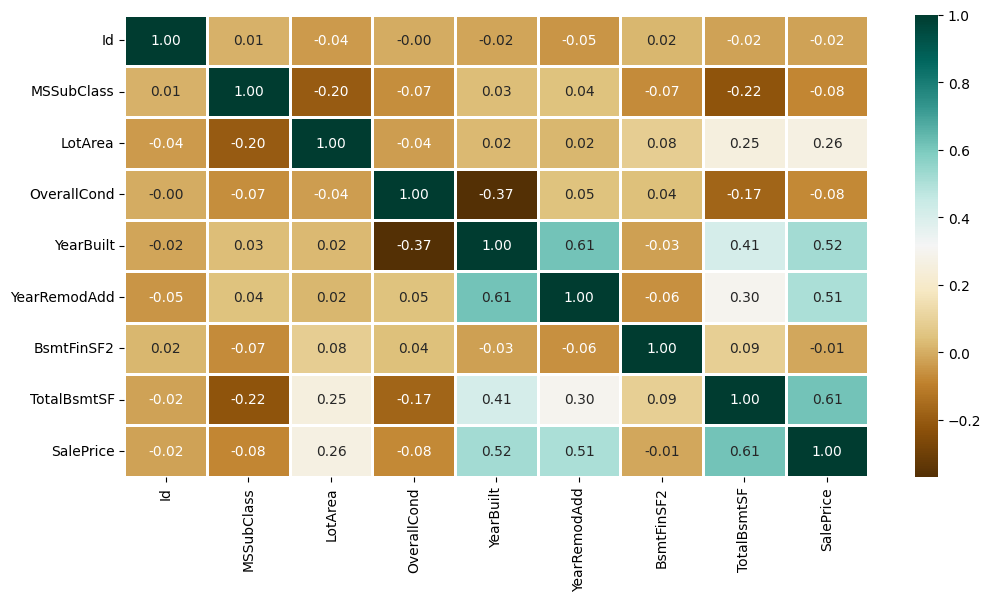

In [13]:
numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

**Analyze different categories**

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

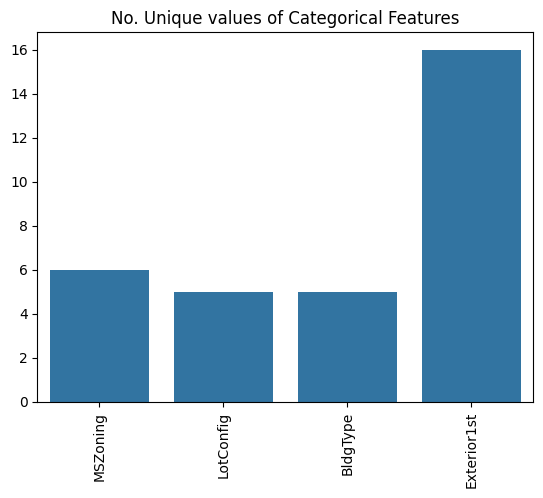

In [14]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

**Data cleaning**

As Id Column will not be participating in any prediction. So we can Drop it.




In [15]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)


In [16]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 


In [17]:
new_dataset = dataset.dropna()


In [18]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)

**Apply one hot encoder**

In [33]:
OH_encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.colomns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

C:\Users\Ymgen\AppData\Local\Temp\ipykernel_38760\2427795383.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  OH_cols.colomns = OH_encoder.get_feature_names_out()


In [49]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_final


MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
5             50    14115            5       1993          1995         0.0   
6             20    10084            5       2004          2005         0.0   
7             60    10382            6       1973          1973        32.0   
8             50     6120            5       1931          1950         0.0   
9            190     7420            6       1939          1950         0.0   
10            20    11200            5       1965          1965         0.0   
11            60    11924            5       2005          2006         0.0   
12            20    12968            6       1962          1962         0.0   
13            20    10652            5       2006          2007         0.0   
14            20    10920            5       1960          1960         0.0   
15            45     6120            8       1929          2001         0.0   
16            20    11241            7       1970          1970         0.0   
17            90    10791            5       1967          1967         0.0   
18            20    13695            5       2004          2004         0.0   
19            20     7560            6       1958          1965         0.0   
20            60    14215            5       2005          2006         0.0   
21            45     7449            7       1930          1950         0.0   
22            20     9742            5       2002          2002         0.0   
23           120     4224            7       1976          1976         0.0   
24            20     8246            8       1968          2001       668.0   
25            20    14230            5       2007          2007         0.0   
26            20     7200            7       1951          2000       486.0   
27            20    11478            5       2007          2008         0.0   
28            20    16321            6       1957          1997         0.0   
29            30     6324            6       1927          1950         0.0   
30            70     8500            4       1920          1950         0.0   
31            20     8544            6       1966          2006         0.0   
32            20    11049            5       2007          2007         0.0   
33            20    10552            5       1959          1959         0.0   
34           120     7313            5       2005          2005         0.0   
35            60    13418            5       2004          2005         0.0   
36            20    10859            5       1994          1995         0.0   
37            20     8532            6       1954          1990         0.0   
38            20     7922            7       1953          2007         0.0   
39            90     6040            5       1955          1955         0.0   
40            20     8658            5       1965          1965         0.0   
41            20    16905            6       1959          1959         0.0   
42            85     9180            7       1983          1983        93.0   
43            20     9200            6       1975          1980       491.0   
44            20     7945            6       1959          1959       506.0   
45           120     7658            5       2005          2005         0.0   
46            50    12822            5       2003          2003         0.0   
47            20    11096            5       2006          2006         0.0   
48           190     4456            5       1920          2008         0.0   
49            20     7742            7       1966       